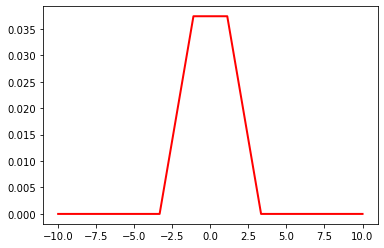

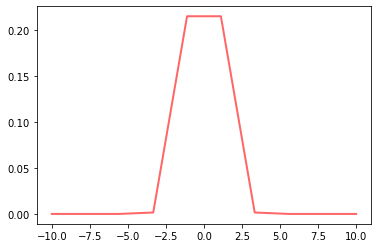

In [94]:
from scipy.stats import norm
sigma = 0.44
mu = 0
bins = np.linspace(-10, 10, 10)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

plt.plot(bins, norm.pdf(bins),'r-', lw=2, alpha=0.6, label='norm pdf')

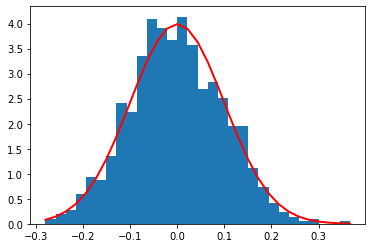

In [99]:
import matplotlib.pyplot as plt
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# Uso distribuzione esponeniale per modellerare densità di probabilità della v.a. $D$
- la densità di probabilità di coverage della locazione $l_i$ in funzione della valori della v.a. $D, d \in \mathbb{R^+}$ è data data da una funzione esponenziale di media $E[D] = \frac{1}{\lambda}$
- i valori assunti dalla v.a. $D$ sono generati con una distribuzione random e com una distribuzione esponenziale

29.62
var 134.98779999999996


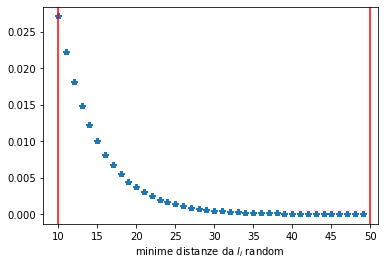

In [27]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

#numero di campioni da generare
n = 10000
# scale = 1/\lambda , quindi scale è la media della distribuzione
scale = 5

#genero dei campioni delle distanze minime dalle locazioni di interesse con una distribuzione random
distances = np.random.randint(10,50,n)
close_distances = np.random.randint(0,10,n)
print(np.mean(distances))
#var = scale^2 (1/\lambda^2)
print("var",np.var(distances))

#calcolo la pdf per ogni valore delle distanze generata
densities = expon.pdf(distances,scale=scale)
plt.plot(distances,densities,'*')
plt.xlabel("minime distanze da $l_i$ random")
plt.axvline(x=50,color="r")
plt.axvline(x=10,color="r")
plt.savefig("../output/Exp_model.png", dpi  = 300)



4.820689812154866
var 25.5898771809946


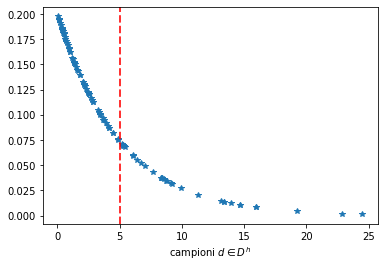

In [15]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

#numero di campioni da generare
n = 100
# scale = 1/\lambda , quindi scale è la media della distribuzione
scale = 5

#genero dei campioni delle distanze minime dalle locazioni di interesse con una distribuzione esponenziale di media scale
distances = np.random.exponential(scale,(n,1))     
print(np.mean(distances))
#var = scale^2 (1/\lambda^2)
print("var",np.var(distances))

#calcolo la pdf per ogni valore delle distanze generata
densities = expon.pdf(distances,scale=scale)
plt.plot(distances,densities,'*')
plt.xlabel("campioni $d \in D^h$ ")
plt.axvline(5, color="r", ls="--", alpha=0.8, lw=2)
#plt.ylabel("Exponential PDF with scale = 1/$\lambda$ = 5")
plt.savefig("../../../Exp_model_exp_samples.png", dpi  = 300)



In [260]:
expon.ppf(0.5, loc=5)

5.693147180559945

In [287]:
expon.pdf(1, scale=1)

0.36787944117144233

# Esempio per fitting di una distribuzione usando le minime distanze dalle locazioni

trying:  <scipy.stats._continuous_distns.alpha_gen object at 0x0000022D4CF8B278>
trying:  <scipy.stats._continuous_distns.anglit_gen object at 0x0000022D4CF8B4A8>
trying:  <scipy.stats._continuous_distns.arcsine_gen object at 0x0000022D4CF8BA58>
trying:  <scipy.stats._continuous_distns.beta_gen object at 0x0000022D4CF8B9B0>
trying:  <scipy.stats._continuous_distns.betaprime_gen object at 0x0000022D4CF8BC88>
trying:  <scipy.stats._continuous_distns.bradford_gen object at 0x0000022D4CF8BF60>
trying:  <scipy.stats._continuous_distns.burr_gen object at 0x0000022D4CF98208>
trying:  <scipy.stats._continuous_distns.cauchy_gen object at 0x0000022D4CF989E8>
trying:  <scipy.stats._continuous_distns.chi_gen object at 0x0000022D4CF98F98>
trying:  <scipy.stats._continuous_distns.chi2_gen object at 0x0000022D4CF98E10>
trying:  <scipy.stats._continuous_distns.cosine_gen object at 0x0000022D4CF9B128>
trying:  <scipy.stats._continuous_distns.dgamma_gen object at 0x0000022D4CF9B6A0>
trying:  <scipy.stat

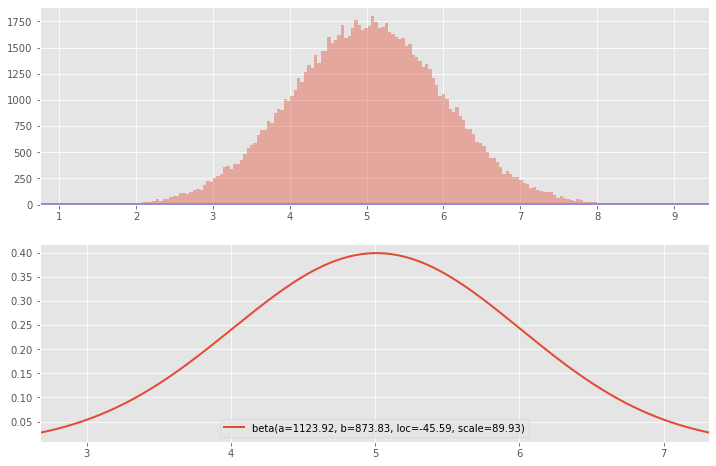

In [364]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy,st.kde
    ]
    
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.norm, st.pareto,st.kde
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:
        print("trying: ",distribution)
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                # compute the error
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis  is not null, plot this pdf as well
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

fig, (ax,ax2) = plt.subplots(2, 1, figsize=(12,8))

n = 99000
# Load data: randomly
data = np.random.randint(1,100,n)

# Load data: following a normal distribution of mu and signa 
mu, sigma = 5, 1 # mean and standard deviation
data = np.random.normal(mu, sigma, n)


# load data: following an exponential distribtion of mean scale
scale = 5
#genero dei campioni delle distanze minime dalle locazioni di interesse con una distribuzione esponenziale di media scale
#data = np.random.exponential(scale,(n,1))  


# plot hist of the data
bins = 200
ax.hist(data,bins=bins,alpha=0.4)

# Find best fit distribution and plot in the same ax
# best distribution minimizes the  Sum of Square Error (SSE) 
best_fit_name, best_fit_params = best_fit_distribution(data, bins, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
#ax.set_ylim(dataYLim)

# Make PDF with best distributiobn and best params
pdf = make_pdf(best_dist, best_fit_params)


# Display

pdf.plot(lw=2, label='PDF', legend=True,ax = ax2)


param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax2.legend([dist_str,"observations"])